In [1]:
import numpy as np

import seaborn as sns
from mimesis import Person
from mimesis.providers.payment import Payment
from mimesis.enums import Gender, CardType
from data_requirements import *
from matplotlib import pyplot as plt 
from data_transformation import *

In [2]:
class DataGenerator:
    @staticmethod
    def generate_personal_data(num_records, seed):
        person = Person('en',seed=seed)
        payment = Payment(seed=seed)

        dtype = np.dtype([
            ('id', np.unicode_, 16),
            ('full_name', np.unicode_, 32),
            ('credit_card_number', np.unicode_, 32),
            ('credit_card_expiration_date', np.unicode_, 8),
            ('gender', np.unicode_, 1),
            ('loan',np.unicode_, 32)
        ])
        
        
        
        np.random.seed(seed)
        
        rng = np.random.randint(0, 2, num_records)
        loans = get_uniform_loans(1000,100000,1000)
        records_npy = np.empty(num_records, dtype=dtype)
        
        for idx in range(num_records):
            if rng[idx] == 0:
                gender = Gender.MALE
            else:    
                gender = Gender.FEMALE
            records_npy['id'][idx] = str('{:016d}'.format(idx))
            records_npy['full_name'][idx] = person.full_name(gender=gender)
            records_npy['credit_card_number'][idx] = payment.credit_card_number(card_type=CardType.VISA)
            records_npy['credit_card_expiration_date'][idx] = payment.credit_card_expiration_date(minimum=20,maximum=25)
            records_npy['gender'][idx] = 'M' if rng[idx] == 0 else 'F'
            if idx < len(loans) - 1:
                records_npy['loan'][idx] = loans[idx]
            else:
                records_npy['loan'][idx] = np.random.choice(loans)        
        records_npy = records_npy[:num_records]
        
        number, same_nameId = uniform_rec_id(records_npy, rng)
        name = get_name(records_npy['full_name'], same_nameId)
        
        for idx in same_nameId:
            records_npy['full_name'][idx] = name    
        return records_npy, name
if __name__ == '__main__':
    data, name = DataGenerator.generate_personal_data(10000,1)
    print(data)

[('0000000000000000', 'Dorotha Mcclain', '4137 9141 7776 3174', '01/23', 'F', '31032.994249370044')
 ('0000000000000001', 'Candra Dyer', '4443 9074 3915 0007', '11/24', 'F', '41046.58442914038')
 ('0000000000000002', 'Cyrus Knapp', '4009 6360 8377 8351', '04/25', 'M', '46049.40901059186')
 ...
 ('0000000000009997', 'Kandace Bernard', '4470 7865 0083 4285', '08/25', 'F', '10008.736986048307')
 ('0000000000009998', 'Delmar Vincent', '4952 4834 5348 6209', '01/22', 'M', '6004.631078314692')
 ('0000000000009999', 'Roselle Santiago', '4813 4435 4546 1577', '03/24', 'F', '23017.359356568228')]


## Data generation

## Data data exploration

In [3]:
SEED = 7
num_records = 50000
data, name = DataGenerator.generate_personal_data(num_records,SEED)
data

array([('0000000000000000', 'Luvenia Wiley', '4331 2601 8159 0839', '01/20', 'F', '89100.54008423086'),
       ('0000000000000001', 'Dirk Heath', '4444 6131 8609 1399', '01/24', 'M', '3002.1631493278883'),
       ('0000000000000002', 'Berry Blackwell', '4599 6030 8246 2813', '10/22', 'F', '99110.10862637371'),
       ...,
       ('0000000000049997', 'Oscar Barnes', '4417 0545 1120 1481', '01/22', 'M', '90100.72236567838'),
       ('0000000000049998', 'Donovan Dorsey', '4889 9985 1750 2863', '08/24', 'M', '22023.39431006226'),
       ('0000000000049999', 'Dan Middleton', '4965 9692 0665 7273', '12/20', 'F', '4004.6655962569407')],
      dtype=[('id', '<U16'), ('full_name', '<U32'), ('credit_card_number', '<U32'), ('credit_card_expiration_date', '<U8'), ('gender', '<U1'), ('loan', '<U32')])

## loan - a random floating point number uniformly distributed in the range between 1000 and 100000 and minimum step 1000

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Uniform ')]

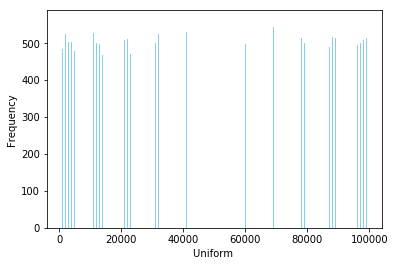

In [4]:
# to show you requirements
loans = np.array([float(i) for i in data['loan']])
ax = sns.distplot(loans,
                  bins=1000,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Uniform ', ylabel='Frequency')

## There should be up to 12 records with the same full_name while the other data can be different. A particular number of such records should be uniformly distributed

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Number of records with the same full_name')]

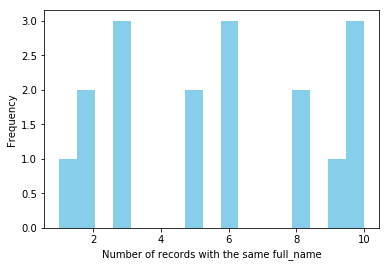

In [5]:
numbers_occurred = []
for i in range(1,18):
    data1, name = DataGenerator.generate_personal_data(100,i)
    number = len([i for i in data1['full_name'] if i == name])
    numbers_occurred.append(number)
    
ax = sns.distplot(numbers_occurred,
                  bins=17,
                  kde=False,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel="Number of records with the same full_name", ylabel='Frequency')    

## Save to  file 

In [6]:
data_path_in, id_file = data_save(data, SEED,"")
data_path_out = "MappedInputData_" + id_file + ".csv"

## Data extraction, transformation and validation

In [7]:
# Read data from text
dtypeFromFile = {'names': ('id',
                           'full_name',
                           'credit_card_number',
                           'credit_card_expiration_date',
                           'gender',
                           'loan'),
                 'formats':('|S16',
                            '|S32',
                            '|S32',
                            '|S8',
                            '|S1',
                            '|S32')}
                 
dataFromFile = np.loadtxt(data_path_in, dtype=dtypeFromFile, delimiter=',')

In [8]:
# For 2 Stage I use part of data from 1 Stage
records = records_array(dataFromFile, SEED)   
print(records.get_name(10))
records.get_id('Chase Marshall')

Chase Marshall


[10]

In [9]:
records.data['user_id']

array([    0,     1,     2, ..., 49997, 49998, 49999])

In [10]:
records.data['gender']

array([0, 1, 0, ..., 1, 1, 0], dtype=int16)

In [11]:
records.data['expiration_date']

array([[2020,    1,   31],
       [2024,    1,   31],
       [2022,   10,   31],
       ...,
       [2022,    1,   31],
       [2024,    8,   31],
       [2020,   12,   31]], dtype=int16)

In [12]:
records.data['loan'] 

array([[11012.46315187, 82090.68555835, 10011.63517138, ...,
        95105.03172516, 78088.81966525,  4004.73932993],
       [11012.46315187, 34043.58706395, 22025.66319073, ...,
        72079.35665887, 20024.86413886, 77081.51151132],
       [36045.2068162 , 78088.81966525, 66071.09073205, ...,
        33039.33720038, 44054.6510783 , 58067.18803837],
       ...,
       [72079.35665887, 16021.8401458 , 37045.278996  , ...,
        87097.3725392 , 66071.09073205, 62070.16778499],
       [ 4004.73932993,  3002.16314933, 25030.96066948, ...,
        33039.33720038, 60069.47933044, 22025.66319073],
       [52062.85447702,  3002.16314933, 23028.67359269, ...,
        11012.46315187, 91101.28301904,  3002.16314933]])

## Validation

In [13]:
unique, index, count = np.unique(dataFromFile, 
                          return_index=True,
                          return_counts=True, axis=0)

In [14]:
invalid_records = unique[count > 10]

In [15]:
invalid_user_list = np.array([records.get_name(i) for i in index[count > 10]])

In [16]:
invalid_index = index[count > 10]

In [17]:
for idx in invalid_index:
    records.remouve_row(idx)

In [18]:
records.data

array([(    0, 0, [2020,    1,   31], [11012.46315187, 82090.68555835, 10011.63517138, 40050.49315993, 26031.58598496, 43053.90488111, 72079.35665887, 95105.03172516, 78088.81966525,  4004.73932993]),
       (    1, 1, [2024,    1,   31], [11012.46315187, 34043.58706395, 22025.66319073, 98108.38660983, 95105.03172516, 40050.49315993, 61069.75009672, 72079.35665887, 20024.86413886, 77081.51151132]),
       (    2, 0, [2022,   10,   31], [36045.2068162 , 78088.81966525, 66071.09073205, 52062.85447702, 11012.46315187, 39048.68635454, 73080.27190419, 33039.33720038, 44054.6510783 , 58067.18803837]),
       ...,
       (49997, 1, [2022,    1,   31], [72079.35665887, 16021.8401458 , 37045.278996  , 19024.35803841, 25030.96066948, 27031.67720383, 84092.81619157, 87097.3725392 , 66071.09073205, 62070.16778499]),
       (49998, 1, [2024,    8,   31], [ 4004.73932993,  3002.16314933, 25030.96066948, 29034.70849542, 10011.63517138, 13019.51374347, 49061.09364297, 33039.33720038, 60069.47933044, 2

In [19]:
records.data['loan']

array([[11012.46315187, 82090.68555835, 10011.63517138, ...,
        95105.03172516, 78088.81966525,  4004.73932993],
       [11012.46315187, 34043.58706395, 22025.66319073, ...,
        72079.35665887, 20024.86413886, 77081.51151132],
       [36045.2068162 , 78088.81966525, 66071.09073205, ...,
        33039.33720038, 44054.6510783 , 58067.18803837],
       ...,
       [72079.35665887, 16021.8401458 , 37045.278996  , ...,
        87097.3725392 , 66071.09073205, 62070.16778499],
       [ 4004.73932993,  3002.16314933, 25030.96066948, ...,
        33039.33720038, 60069.47933044, 22025.66319073],
       [52062.85447702,  3002.16314933, 23028.67359269, ...,
        11012.46315187, 91101.28301904,  3002.16314933]])

In [20]:
loans_dict = get_loans(records)
rewrite_loans(records, loans_dict)

In [21]:
records.data

array([(    0, 0, [2020,    1,   31], [63952387.41950694, 63530966.81564663, 64087671.91437761, 62852370.94051827, 63598006.8018615 , 65183891.6602595 , 65134595.54847924, 64085558.45355438, 66644302.56356726, 63158565.21689467]),
       (    1, 1, [2024,    1,   31], [84336957.94451419, 86650529.487753  , 86301039.82316232, 87278087.23212501, 86017669.98593122, 84769407.23364604, 85168954.60078454, 86686516.12448783, 84988751.22737978, 86001767.48059218]),
       (    2, 0, [2022,   10,   31], [88975261.65505362, 88777809.30961761, 89550930.77588935, 89949349.4392019 , 89926143.86001046, 88390692.69617292, 89217317.681822  , 89558906.1436581 , 91271778.56597061, 87583513.85354848]),
       ...,
       (49997, 1, [2022,    1,   31], [ 7866978.29378902,  8372569.14531297,  7577748.08396999,  8299514.98587508,  8486747.78108062,  8252492.77452137,  8156435.31249073,  8554741.29066491,  7843979.90211925,  7472588.10420491]),
       (49998, 1, [2024,    8,   31], [14878080.37325052, 162736

In [22]:
np.savetxt(data_path_out, records.data, delimiter=',',fmt=('%16s', '%16s', '%32s', '%32s'),
           header='user_id gender expiration_date loan')

## Simulation and Analysis

In [23]:
from data_calculation import *

In [24]:


def get_next_array(array, indx_payment,sum_cur, records, idx):
    res = []
    gender = records.data['gender'][idx]
    expiration_date = records.data['expiration_date'][idx]
    sum_cur = np.sum(array)
    for prog in range(10):
        prev_loan0 = array[prog]
        monthly_payment_lst = get_monthly_payment(records, idx, prog,sum_cur) 
        for i in range(get_projection_number(expiration_date)):
            prev_loan0 = loan(sum_cur, prev_loan0, gender, get_payment(prev_loan0, gender, monthly_payment_lst[indx_payment]))
        res.append(prev_loan0)
    return np.array(res)

def get_matrix(records, idx):
    sum_cur = np.sum(records.data['loan'][idx])
    res = []
    for indx_payment in range(100):
        if indx_payment == 0:
            array = records.data['loan'][idx]
        else:
            sum_cur = np.sum(array)
            res.append(array)
            array = get_next_array(array, indx_payment,sum_cur, records, idx)
    return np.array(res)        
get_matrix(records, 10)        

# This task is unclear for me ! =( 
# But still some functions in data_calculation is usful
# get_projection_number(expiration_date) -> projection_number
# get_monthly_payment(records, idx, prog) 
# payment(prev, gender, payment_rate)
# loan(curent_sum, prev, gender, payment_rate)





C:\Users\Admin\Desktop\AI\ML\Eleks\data_calculation.py:19: RuntimeWarning: overflow encountered in double_scalars
  return prev *  payment_rate  * mortality


array([[44535060.79648936, 44173589.43868553, 43547157.2787296 ,
        43659218.77291144, 43160605.08295467, 45199729.75395335,
        44306930.64326985, 45626299.8963147 , 43699188.65156374,
        44641313.35339984],
       [              inf,               inf,               inf,
                      inf,               inf,               inf,
                      inf,               inf,               inf,
                      inf],
       [              inf,               inf,               inf,
                      inf,               inf,               inf,
                      inf,               inf,               inf,
                      inf],
       [              inf,               inf,               inf,
                      inf,               inf,               inf,
                      inf,               inf,               inf,
                      inf],
       [              inf,               inf,               inf,
                      inf,               in